# LastFM Recommendation System - EDA
June [x] 2018  

### Import files and packages

In [1]:
# check kernel (optional)
import sys
sys.executable

'/home/cipher000/anaconda3/envs/ipykernel_py3/bin/python'

In [2]:
# First we import our packages needed for this analysis
import pandas as pd
import numpy as np

# for EDA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
play = pd.read_pickle('../data/recsys_plays.pkl')
tag = pd.read_pickle('../data/recsys_tags.pkl')
friend = pd.read_pickle('../data/recsys_friends.pkl')

In [4]:
# sets output to three decimals
pd.set_option('display.float_format',lambda x: '%.3f' %x)

### Exploratory Data Analysis (EDA)

Analyze by:
- Play. Total plays of artist by user.  
- Tag. User tags attributed to each artist, including timestamp.  
- Friend. Network of each user.

In [5]:
dfs = [play,tag,friend]
for df in dfs:
    print(df.columns)
    print(df.shape)
    print('\n')

Index(['name', 'userID', 'artistID', 'weight', 'ever_played'], dtype='object')
(92834, 5)


Index(['userID', 'artistID', 'tagID', 'timestamp', 'day', 'month', 'year',
       'tagValue', 'name'],
      dtype='object')
(186479, 9)


Index(['userID', 'friendID'], dtype='object')
(25434, 2)




### Play
Total artist plays by user.

In [6]:
play.head()

name  userID  artistID  weight  ever_played
0     MALICE MIZER      34         1     212            1
1     MALICE MIZER     274         1     483            1
2     MALICE MIZER     785         1      76            1
3  Diary of Dreams     135         2    1021            1
4  Diary of Dreams     257         2     152            1

In [7]:
# artists are played a median of 260 times, and mean of 745 times
play.describe()

userID  artistID     weight  ever_played
count 92834.000 92834.000  92834.000    92834.000
mean   1037.010  3331.123    745.244        1.000
std     610.870  4383.591   3751.322        0.000
min       2.000     1.000      1.000        1.000
25%     502.000   436.000    107.000        1.000
50%    1029.000  1246.000    260.000        1.000
75%    1568.000  4350.000    614.000        1.000
max    2100.000 18745.000 352698.000        1.000

In [8]:
play.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92834 entries, 0 to 92833
Data columns (total 5 columns):
name           92834 non-null object
userID         92834 non-null int64
artistID       92834 non-null int64
weight         92834 non-null int64
ever_played    92834 non-null int64
dtypes: int64(4), object(1)
memory usage: 4.2+ MB


In [9]:
# 69 million plays in the dataset
play.weight.sum()

69183975

In [10]:
# plays per artist
play.weight.sum() / play.artistID.nunique()

3923.773536751361

In [11]:
# plays per user
play.weight.sum() / play.userID.nunique()

36566.582980972518

In [12]:
play.artistID.nunique()

17632

In [13]:
# Obtain total plays by artist
ap2 = (play.groupby(['name'])['weight'].sum().reset_index().
                rename(columns={'weight':'total_artist_plays','name':'artist_name'})
               [['artist_name','total_artist_plays']])

In [14]:
ap2['total_plays_pct'] = 100*(ap2['total_artist_plays']/ap2['total_artist_plays'].sum())

In [15]:
ap2[ap2['artist_name']=='Britney Spears']

artist_name  total_artist_plays  total_plays_pct
2336  Britney Spears             2393140            3.459

In [16]:
ap3 = ap2.sort_values(['total_artist_plays'],ascending=False)

In [17]:
ap3.head()

artist_name  total_artist_plays  total_plays_pct
2336       Britney Spears             2393140            3.459
3998         Depeche Mode             1301308            1.881
8352            Lady Gaga             1291387            1.867
3023   Christina Aguilera             1058405            1.530
11069            Paramore              963449            1.393

In [18]:
def bar_chart_int(x,y,x_label,y_label,title,caption,total_val):
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 5)
    ax = sns.barplot(x[:20], y[:20], palette="magma")
    ax.set_xlabel(x_label,fontweight='bold')
    ax.set_ylabel(y_label,fontweight='bold')
    ax.set_title(title,fontweight='bold')

    for p in ax.patches:
        height = p.get_height()
        pct = 100*(height/total_val)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(pct),
                ha="center",verticalalignment='bottom',fontweight='bold',color='black') 

    ax.text(19, max(y[:20])*0.95, caption, style='italic',fontsize=12,horizontalalignment='right')

    plt.xticks(rotation=90)
    plt.show()        

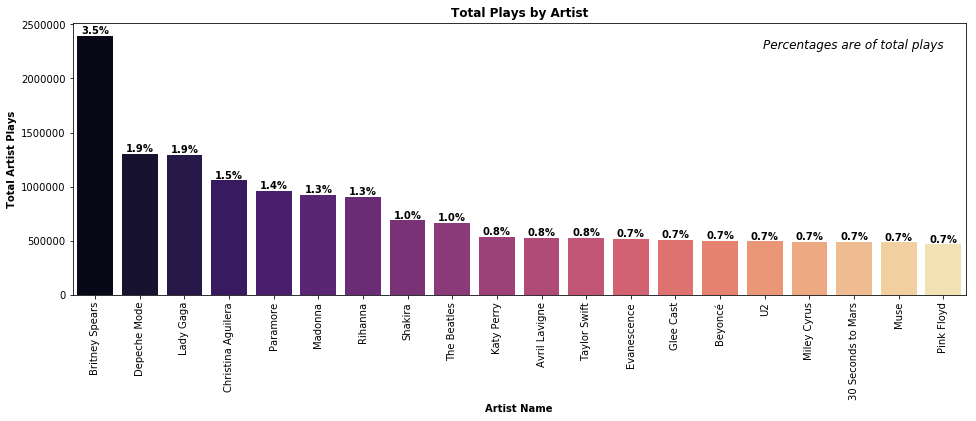

In [19]:
x = ap3.artist_name
y = ap3.total_artist_plays
x_label = 'Artist Name'
y_label = 'Total Artist Plays'
title = 'Total Plays by Artist'
caption = 'Percentages are of total plays'
total_val = ap3.total_artist_plays.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

In [20]:
play.head()

name  userID  artistID  weight  ever_played
0     MALICE MIZER      34         1     212            1
1     MALICE MIZER     274         1     483            1
2     MALICE MIZER     785         1      76            1
3  Diary of Dreams     135         2    1021            1
4  Diary of Dreams     257         2     152            1

In [21]:
play.head()

name  userID  artistID  weight  ever_played
0     MALICE MIZER      34         1     212            1
1     MALICE MIZER     274         1     483            1
2     MALICE MIZER     785         1      76            1
3  Diary of Dreams     135         2    1021            1
4  Diary of Dreams     257         2     152            1

In [22]:
play2 = play.groupby(['name']).count().reset_index()[['name','ever_played']]
play3 = play2.sort_values(['ever_played'],ascending=False)

In [23]:
play2.head()

name  ever_played
0           !!!            2
1      !DISTAIN            2
2      !deladap            1
3         #####            8
4  #2 Orchestra            1

In [24]:
play3.head()

name  ever_played
8352        Lady Gaga          611
2336   Britney Spears          522
12072         Rihanna          484
14109     The Beatles          480
7913       Katy Perry          473

In [25]:
play3.describe()

ever_played
count    17632.000
mean         5.265
std         20.620
min          1.000
25%          1.000
50%          1.000
75%          3.000
max        611.000

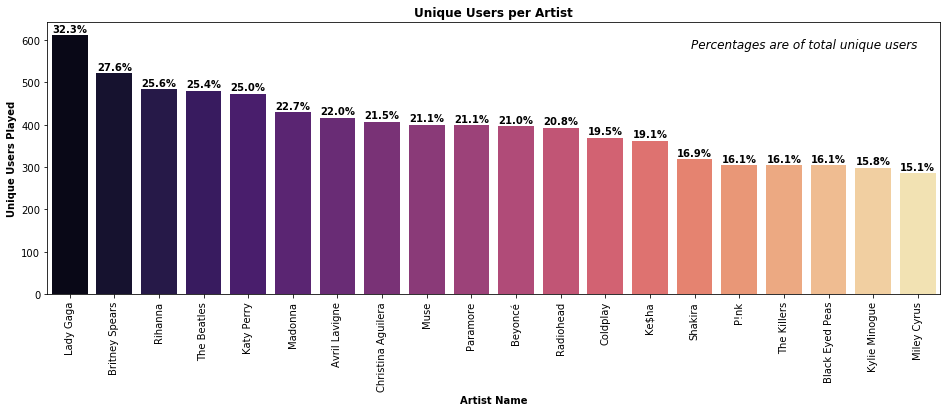

In [26]:
# Lady Gaga has been played by 32.3% of the users in the sample
x = play3.name
y = play3.ever_played
x_label = 'Artist Name'
y_label = 'Unique Users Played'
title = 'Unique Users per Artist'
caption = 'Percentages are of total unique users'
total_val = play.userID.nunique()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

In [27]:
# plays per user
ppu = pd.merge(play2,ap2,how='outer',left_on='name',right_on='artist_name')

ppu['plays_per_user'] = ppu['total_artist_plays']/ppu['ever_played']

ppu2 = ppu.sort_values(['total_artist_plays'],ascending=False)

In [28]:
ppu2.head()

name  ever_played         artist_name  \
2336       Britney Spears          522      Britney Spears   
3998         Depeche Mode          282        Depeche Mode   
8352            Lady Gaga          611           Lady Gaga   
3023   Christina Aguilera          407  Christina Aguilera   
11069            Paramore          399            Paramore   

       total_artist_plays  total_plays_pct  plays_per_user  
2336              2393140            3.459        4584.559  
3998              1301308            1.881        4614.567  
8352              1291387            1.867        2113.563  
3023              1058405            1.530        2600.504  
11069              963449            1.393        2414.659

In [29]:
ppu3 = ppu.sort_values(['plays_per_user'],ascending=False)

In [30]:
# check whether it is possible that a single user can play an artist 35k times.  
# if not, figure out reasonable assumptions
# may want to clean data such that all artists need to have at least 10 
# unique users
ppu3.head()

name  ever_played      artist_name  total_artist_plays  \
15929     Viking Quest            1     Viking Quest               35323   
15624       Tyler Adam            1       Tyler Adam               30614   
12339           Rytmus            1           Rytmus               23462   
7504   Johnny Hallyday            2  Johnny Hallyday               32995   
4118       Dicky Dixon            1      Dicky Dixon               15345   

       total_plays_pct  plays_per_user  
15929            0.051       35323.000  
15624            0.044       30614.000  
12339            0.034       23462.000  
7504             0.048       16497.500  
4118             0.022       15345.000

In [31]:
# only one user has ever played Viking Quest, but they played it
# over 35,000 times.  We may want to filter out these niche artists
play[play['name']=='Viking Quest']

name  userID  artistID  weight  ever_played
80046  Viking Quest     596      8388   35323            1

In [32]:
play[play['userID']==596]

name  userID  artistID  weight  \
372                              And One     596        30     586   
590                          Duran Duran     596        51     536   
1354                           New Order     596        59    1254   
2664                        Depeche Mode     596        72   13228   
3083                         Marc Almond     596        82    1038   
5207                            The Cure     596       159     855   
5889                     Scissor Sisters     596       167     834   
6803                                a-ha     596       187     265   
8081                                Blur     596       203     333   
22733                         The Smiths     596       429    5863   
23457                       Joy Division     596       441   16295   
30321                        David Bowie     596       599     739   
34257                             R.E.M.     596       715     440   
37452             The Velvet Underground     596       863     608   
37602                          The Doors     596       868     506   
37735                            Bauhaus     596       875     408   
41153                       Simple Minds     596       993     310   
41256  Orchestral Manoeuvres in the Dark     596       998     388   
41334                      Pet Shop Boys     596      1001    1270   
41522                            Erasure     596      1014    1304   
41585                              Yazoo     596      1019     240   
42864                          Kraftwerk     596      1073     309   
43046          Siouxsie and the Banshees     596      1083    1166   
43719                           Iggy Pop     596      1103     245   
46926                         VNV Nation     596      1295     259   
50735                            Ramones     596      1513     297   
51089               The Sisters of Mercy     596      1534     406   
53748                        Patti Smith     596      1811     230   
53780                        Sex Pistols     596      1814     456   
54481                         Gary Numan     596      1886     291   
59051                  Throbbing Gristle     596      2470     310   
59471                          Morrissey     596      2531    4360   
59773                       Culture Club     596      2552     244   
59819                         Kajagoogoo     596      2559     227   
60559                            Sublime     596      2637     577   
62398                Echo & The Bunnymen     596      2938     255   
64429                         The B-52's     596      3281     233   
65483                    Alien Sex Fiend     596      3431     372   
67187                          Soft Cell     596      3768    3379   
67293                     Violent Femmes     596      3781     284   
67916                     The Associates     596      3941     610   
72692                           Adam Ant     596      5258     314   
72698                  Adam and the Ants     596      5260    1535   
73076                               Nico     596      5420     255   
74100                          Buzzcocks     596      5785     483   
75391                         Klaus Nomi     596      6241     353   
76587                         Air Supply     596      6722     314   
78071                         Fad Gadget     596      7343     839   
80046                       Viking Quest     596      8388   35323   
80047                         The Bogmen     596      8389     243   

       ever_played  
372              1  
590              1  
1354             1  
2664             1  
3083             1  
5207             1  
5889             1  
6803             1  
8081             1  
22733            1  
23457            1  
30321            1  
34257            1  
37452            1  
37602            1  
37735            1  
41153            1  
41256            1  
41334            1  
41522            1  
41585            1  
428

In [33]:
play[play['name']=='Britney Spears'].count()

name           522
userID         522
artistID       522
weight         522
ever_played    522
dtype: int64

In [34]:
# plays per userID
plays_user = play.groupby(['userID']).sum().reset_index()[['userID','weight']]
plays_user2 = plays_user.sort_values(['weight'],ascending=False)

In [35]:
# userID 757 has 480,000 plays.  At 4 mins/song that is 3.65 years played nonstop
# the only explanation I can think of would be if the account was used simultaneously by multiple computers
plays_user2.head()

userID  weight
705      757  480039
1802    2000  468409
1280    1418  416349
1482    1642  388251
1002    1094  379125

In [36]:
u757 = play[play['userID']==757].sort_values(['weight'],ascending=False)

In [37]:
u757.head()

name  userID  artistID  weight  ever_played
33127         Shakira     757       701  169596            1
14902         Beyoncé     757       295   60877            1
12887         Rihanna     757       288   31800            1
13377  Britney Spears     757       289   30230            1
25358          Eminem     757       475   26933            1

In [38]:
u757['weight'].sum()

480039

In [39]:
u757['pct_played'] = 100*(u757['weight'] / u757['weight'].sum())

In [40]:
u757.head()

name  userID  artistID  weight  ever_played  pct_played
33127         Shakira     757       701  169596            1      35.330
14902         Beyoncé     757       295   60877            1      12.682
12887         Rihanna     757       288   31800            1       6.624
13377  Britney Spears     757       289   30230            1       6.297
25358          Eminem     757       475   26933            1       5.611

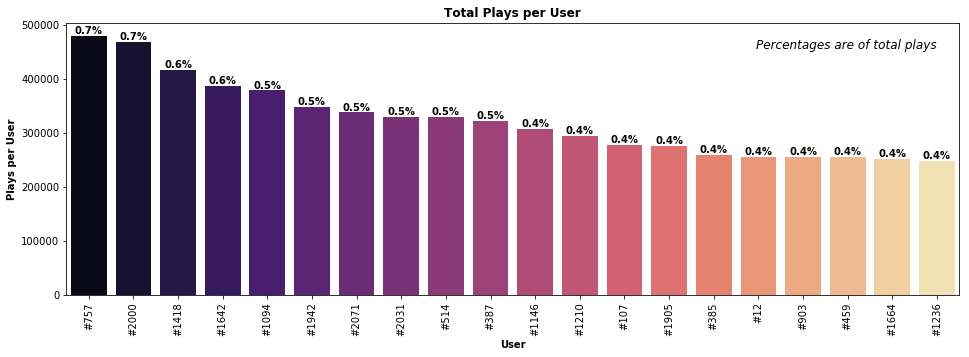

In [41]:
plays_user2.userID = plays_user2.userID.apply(lambda x: '#' + str(x))

x = plays_user2.userID
y = plays_user2.weight
x_label = 'User'
y_label = 'Plays per User'
title = 'Total Plays per User'
caption = 'Percentages are of total plays'
total_val = play.weight.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

In [42]:
# play[(play['name']=='Britney Spears') & (play['weight']>0)].count()
# play[(play['name']=='Britney Spears') & (play['weight']>0)].sum()

In [43]:
# 69 million plays divided by 1892 users is 36,566 plays per user (~100 days)
play.weight.sum() / play.userID.nunique()

36566.582980972518

In [44]:
# TODO determine better total value
ppu4 = ppu2.sort_values(['plays_per_user'],ascending=False)
x = ppu4.name
y = ppu4.plays_per_user
x_label = 'Artist Name'
y_label = 'Average Plays per User'
title = 'Top Plays per User'
caption = 'Percentages are of percent of total plays'
total_val = play.weight.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

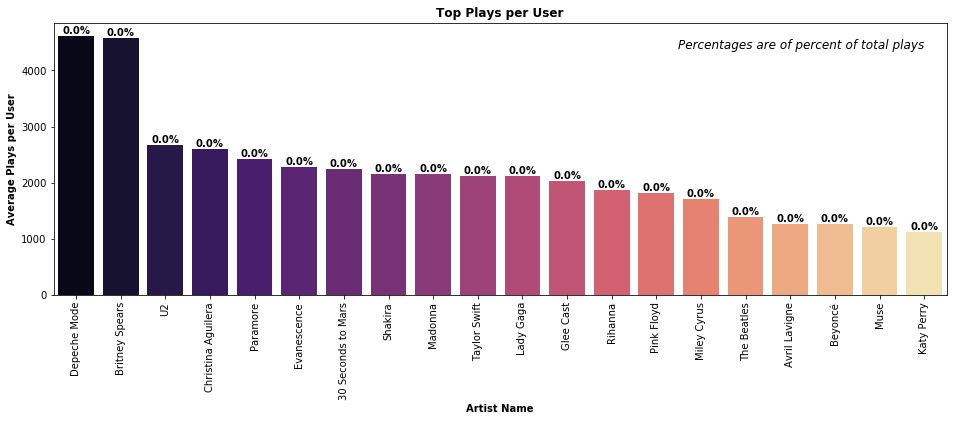

In [45]:
# TODO determine better total value
# Only including top names
ppu4 = ppu2[:20].sort_values(['plays_per_user'],ascending=False)
x = ppu4.name
y = ppu4.plays_per_user
x_label = 'Artist Name'
y_label = 'Average Plays per User'
title = 'Top Plays per User'
caption = 'Percentages are of percent of total plays'
total_val = play.weight.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

In [46]:
play.head()

name  userID  artistID  weight  ever_played
0     MALICE MIZER      34         1     212            1
1     MALICE MIZER     274         1     483            1
2     MALICE MIZER     785         1      76            1
3  Diary of Dreams     135         2    1021            1
4  Diary of Dreams     257         2     152            1

In [47]:
# total unique artists played by each user
# play2 = play.groupby(['name']).count().reset_index()[['name','ever_played']]

up = play.groupby(['userID']).count().reset_index()[['userID','artistID']]

In [48]:
play[play['userID']==34].count()

name           50
userID         50
artistID       50
weight         50
ever_played    50
dtype: int64

In [49]:
play[play['userID']==1878]

Empty DataFrame
Columns: [name, userID, artistID, weight, ever_played]
Index: []

In [50]:
play[play['userID']==1879].count()

name           50
userID         50
artistID       50
weight         50
ever_played    50
dtype: int64

In [51]:
up.describe()

userID  artistID
count 1892.000  1892.000
mean  1038.433    49.067
std    610.410     5.846
min      2.000     1.000
25%    505.500    50.000
50%   1031.000    50.000
75%   1572.250    50.000
max   2100.000    50.000

### Tag
User tags of artists.

In [52]:
tag.head()

userID  artistID  tagID      timestamp  day  month  year          tagValue  \
0       2        52     13  1238536800000    1      4  2009          chillout   
1       2        52     15  1238536800000    1      4  2009         downtempo   
2       2        52     18  1238536800000    1      4  2009        electronic   
3       2        52     21  1238536800000    1      4  2009          trip-hop   
4       2        52     41  1238536800000    1      4  2009  female vovalists   

        name  
0  Morcheeba  
1  Morcheeba  
2  Morcheeba  
3  Morcheeba  
4  Morcheeba

In [53]:
tag2 = tag.groupby(['tagValue']).count().reset_index()[['tagID','tagValue']]

In [54]:
tag2.head()

tagID              tagValue
0      4                  '80s
1      3  -pearl fashion music
2     40            0 play yet
3      1                    00
4     37                  00's

In [55]:
tag2.shape

(9749, 2)

In [56]:
tag2.tagID.sum()

186479

In [57]:
tag3 = tag2.sort_values(['tagID'],ascending=False)

In [58]:
tag3.head()

tagID     tagValue
7473   7503         rock
6802   5418          pop
441    5251  alternative
2709   4672   electronic
4393   4458        indie

In [59]:
tag3.tagID.sum()

186479

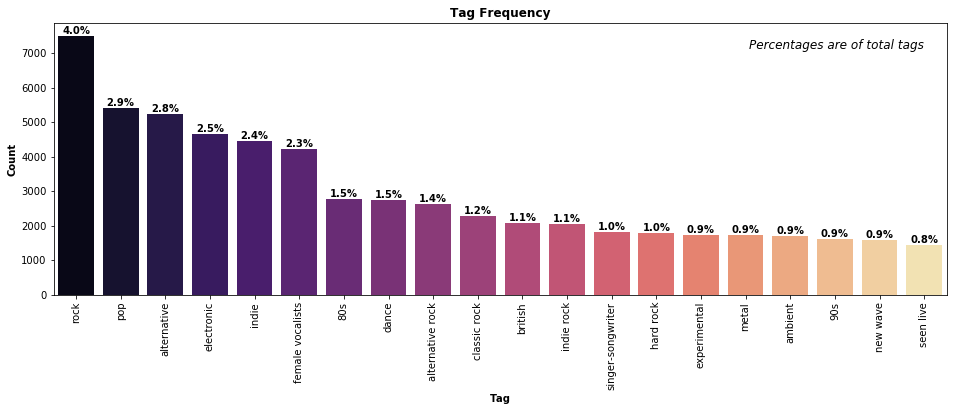

In [60]:
x = tag3.tagValue
y = tag3.tagID
x_label = 'Tag'
y_label = 'Count'
title = 'Tag Frequency'
caption = 'Percentages are of total tags'
total_val = tag3.tagID.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

In [61]:
# x = tag3.tagValue
# y = tag3.tagID

# fig, ax = plt.subplots()
# fig.set_size_inches(16, 5)
# ax = sns.barplot(x, y, palette="magma")
# ax.set_xlabel("Tag",fontweight='bold')
# ax.set_ylabel("Count",fontweight='bold')
# ax.set_title('Tag Frequency',fontweight='bold')
# plt.xticks(rotation=90)
# plt.show()

In [62]:
tags_per_artist = tag.groupby(['name']).count().reset_index()[['name','tagID']]
tpa2 = tags_per_artist.sort_values(['tagID'],ascending=False)

In [63]:
# Britney Spears is also the most tagged artist
tpa2.head()

name  tagID
1637      Britney Spears    931
5770           Lady Gaga    767
2113  Christina Aguilera    762
6312             Madonna    730
2781        Depeche Mode    701

In [64]:
tpa2.tagID.sum()

184941

In [65]:
x = tpa2.name
y = tpa2.tagID
x_label = 'Artist'
y_label = 'Tag Count'
title = 'Tag Count by Artist'
caption = 'Percentages are of total tags'
total_val = tpa2.tagID.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

In [66]:
# x = tpa2.name
# y = tpa2.tagID

# fig, ax = plt.subplots()
# fig.set_size_inches(16, 5)
# ax = sns.barplot(x, y, palette="magma")
# ax.set_xlabel("Artist",fontweight='bold')
# ax.set_ylabel("Tag Count",fontweight='bold')
# ax.set_title('Tag Count by Artist',fontweight='bold')
# plt.xticks(rotation=90)
# plt.show()

In [67]:
bs_tags = tag[tag['name']=='Britney Spears'].groupby(['tagValue']).count().reset_index()[['tagID','tagValue']]
bs2 = bs_tags.sort_values(['tagID'],ascending=False)

In [68]:
bs2.head()

tagID          tagValue
231    108               pop
90      64             dance
127     50  female vocalists
177     45            legend
68      37    britney spears

In [69]:
bs2.tagID.sum()

931

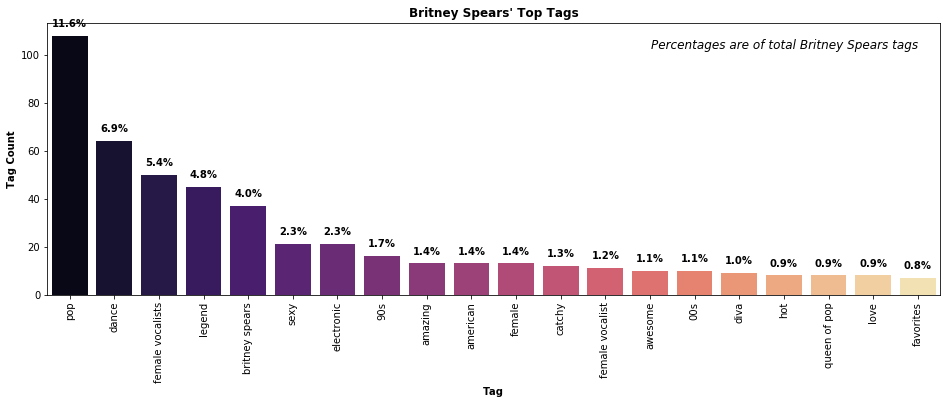

In [70]:
x = bs2.tagValue
y = bs2.tagID
x_label = 'Tag'
y_label = 'Tag Count'
title = 'Britney Spears\' Top Tags'
caption = 'Percentages are of total Britney Spears tags'
total_val = bs2.tagID.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

In [71]:
# x = bs2.tagValue
# y = bs2.tagID

# fig, ax = plt.subplots()
# fig.set_size_inches(16, 5)
# ax = sns.barplot(x, y, palette="magma")
# ax.set_xlabel("Tag",fontweight='bold')
# ax.set_ylabel("Tag Count",fontweight='bold')
# ax.set_title('Britney Spears\' Top Tags',fontweight='bold')
# plt.xticks(rotation=90)
# plt.show()

### Friends
Friend network of users.

In [72]:
friend.head()

userID  friendID
0       2       275
1       2       428
2       2       515
3       2       761
4       2       831

In [73]:
friend.nunique()

userID      1892
friendID    1892
dtype: int64

In [74]:
fr = friend.groupby(['userID']).count().reset_index()[['userID','friendID']]
fr2 = fr.sort_values(['friendID'],ascending=False)

In [75]:
# the average user has 13.4 friends
fr.friendID.describe()

count   1892.000
mean      13.443
std       17.312
min        1.000
25%        3.000
50%        6.000
75%       17.000
max      119.000
Name: friendID, dtype: float64

In [76]:
fr2.head()

userID  friendID
1394    1543       119
1164    1281       110
772      831       106
169      179        97
1359    1503        95

In [77]:
# fr2['userID'] = fr2['userID'].astype(str)
# fr2.head()

In [78]:
fr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1892 entries, 1394 to 1718
Data columns (total 2 columns):
userID      1892 non-null int64
friendID    1892 non-null int64
dtypes: int64(2)
memory usage: 44.3 KB


In [79]:
fr2.head()

userID  friendID
1394    1543       119
1164    1281       110
772      831       106
169      179        97
1359    1503        95

In [80]:
# fr2.columns = ['userID','count']

In [81]:
# fr2 = fr2.sort_values(['count'],ascending=False)

In [82]:
fr2.head()

userID  friendID
1394    1543       119
1164    1281       110
772      831       106
169      179        97
1359    1503        95

In [83]:
fr2.head()

userID  friendID
1394    1543       119
1164    1281       110
772      831       106
169      179        97
1359    1503        95

In [84]:
fr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1892 entries, 1394 to 1718
Data columns (total 2 columns):
userID      1892 non-null int64
friendID    1892 non-null int64
dtypes: int64(2)
memory usage: 44.3 KB


In [85]:
fr3 = fr2.sort_values(['friendID'],ascending=False).reset_index(drop=True)

In [86]:
fr3.userID = fr3.userID.apply(lambda x: '#' + str(x))

In [87]:
fr3.head()

userID  friendID
0  #1543       119
1  #1281       110
2   #831       106
3   #179        97
4  #1503        95

In [88]:
fr3.friendID.sum()

25434

In [89]:
friend.userID.nunique()

1892

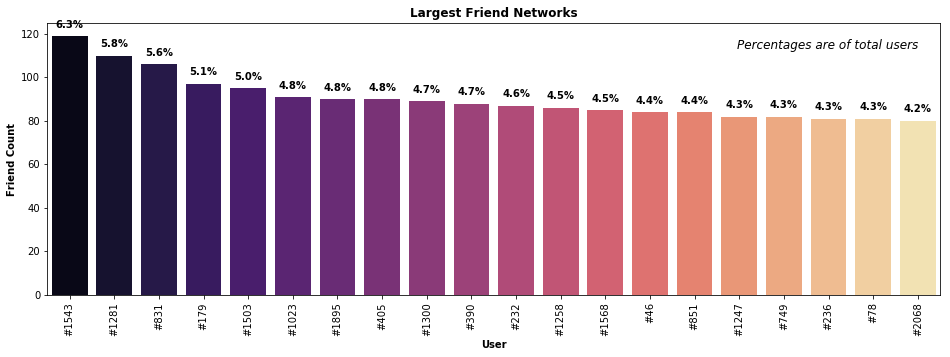

In [90]:
x = fr3.userID
y = fr3.friendID
x_label = 'User'
y_label = 'Friend Count'
title = 'Largest Friend Networks'
caption = 'Percentages are of total users'
total_val = friend.userID.nunique()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

In [91]:
# fig, ax = plt.subplots()
# fig.set_size_inches(16, 5)
# ax = sns.barplot(fr3.userID, fr3.friendID, palette="magma")
# ax.set_xlabel("User",fontweight='bold')
# ax.set_ylabel("Friend Count",fontweight='bold')
# ax.set_title('Most Popular Users',fontweight='bold')
# plt.xticks(rotation=90)
# plt.show()

In [92]:
import networkx as nx

In [93]:
G = nx.Graph()
G.add_nodes_from(friend.userID[:50])

In [94]:
for i in range(len(friend.userID[:50])):
    G.add_edge(friend.userID.iloc[i],friend.friendID.iloc[i])


In [95]:
G.number_of_nodes()

53

In [96]:
G.number_of_edges()

50

In [97]:
import igraph as ig

In [98]:
Edges=[(friend.userID.iloc[i],friend.friendID.iloc[i]) for i in range(len(friend))]
Nodes=[(friend.userID.iloc[i],1) for i in range(len(friend))]

In [99]:
labels = []
group = []
for node in Nodes:
    labels.append(node[0])
    group.append(node[1])

In [100]:
G=ig.Graph(Edges,directed=False)

In [101]:
layt=G.layout('kk',dim=3)

In [102]:
layt[5]

[-8.32181606776442, -41.80311858219441, 47.52016692917826]

In [103]:
N = len(layt)
Xn = [layt[k][0] for k in range(N)]
Yn = [layt[k][1] for k in range(N)]
Zn = [layt[k][2] for k in range(N)]
Xe = []
Ye = []
Ze = []

for e in Edges:
    Xe+=[layt[e[0]][0], layt[e[1]][0],None]
    Ye+=[layt[e[0]][1], layt[e[1]][1],None]
    Ze+=[layt[e[0]][2], layt[e[1]][2],None]

In [104]:
import plotly.plotly as py
import plotly.graph_objs as go

In [105]:
trace1=go.Scatter3d(x=Xe,y=Ye,z=Ze,
                    mode='lines',
                    line=dict(color='rgb(125,125,125)',width=1),
                   hoverinfo='none')
trace2=go.Scatter3d(x=Xn,y=Yn,z=Zn,
                    mode='markers',
                    name='actors',
                    marker=dict(symbol='dot',
                                size=6,
                                color=group,
                                colorscale='Viridis',
                                line=dict(color='rgb(125,125,125)',width=0.5)),
                    text=labels,
                    hoverinfo='text')

In [106]:
axis=dict(showbackground=False,
         showline=False,
         zeroline=False,
         showgrid=False,
         showticklabels=False,
         title='')

In [107]:
layout = go.Layout(
            title='LastFM Friend Network',
            width=1000,
            height=1000,
            showlegend=False,
            scene=dict(xaxis=dict(axis),
                      yaxis=dict(axis),
                      zaxis=dict(axis),
                      ),
            margin=dict(t=100),
            hovermode='closest',
            annotations=[dict(showarrow=False,
                 text='Data Source: www.last.fm, courtesy of Lab41/GroupLens',
                 xref='paper',
                 yref='paper',
                 x=0,
                 y=0.1,
                 xanchor='left',
                 yanchor='bottom',
                 font=dict(size=14))],)

In [108]:
data=[trace1,trace2]

In [109]:
data

[{'hoverinfo': 'none',
  'line': {'color': 'rgb(125,125,125)', 'width': 1},
  'mode': 'lines',
  'type': 'scatter3d',
  'x': [-7.647938027712406,
   -8.149695187602497,
   None,
   -7.647938027712406,
   -7.269569009995365,
   None,
   -7.647938027712406,
   -7.08035182332664,
   None,
   -7.647938027712406,
   -7.91417181432812,
   None,
   -7.647938027712406,
   -8.503855439151495,
   None,
   -7.647938027712406,
   -7.878917173127898,
   None,
   -7.647938027712406,
   -8.207051192710477,
   None,
   -7.647938027712406,
   -8.054201719995275,
   None,
   -7.647938027712406,
   -8.86745132934115,
   None,
   -7.647938027712406,
   -6.647056059655185,
   None,
   -7.647938027712406,
   -7.215359695777489,
   None,
   -7.647938027712406,
   -8.644423222816696,
   None,
   -7.647938027712406,
   -7.963832953994202,
   None,
   -7.947857976627032,
   -8.626241285604708,
   None,
   -7.947857976627032,
   -7.571850994473487,
   None,
   -7.947857976627032,
   -8.098545679210723,
   None,


In [110]:
fig=go.Figure(data=data,layout=layout)

py.iplot(fig,filename='LastFM Friend Network')

/home/cipher000/anaconda3/envs/ipykernel_py3/lib/python3.5/site-packages/plotly/plotly/plotly.py:224: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.

/home/cipher000/anaconda3/envs/ipykernel_py3/lib/python3.5/site-packages/plotly/plotly/plotly.py:224: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, 

The draw time for this plot will be slow for clients without much RAM.


/home/cipher000/anaconda3/envs/ipykernel_py3/lib/python3.5/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Slow

